In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OneHotEncoder
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("clean_data.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [3]:
## Independent and dependent features
X = df.drop(labels=['Churn'],axis=1)
Y = df[['Churn']]

In [4]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [5]:
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [6]:
numerical_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [7]:
df[categorical_cols].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [8]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoder',OneHotEncoder(categories='auto'))
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [9]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder())]),
                                 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])

In [10]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [11]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
y_train.value_counts()

Churn
0        3675
1        1255
Name: count, dtype: int64

In [14]:
smote=SMOTE()
x_rec,y_rec=smote.fit_resample(X_train,y_train)

In [15]:
y_rec.value_counts()

Churn
0        3675
1        3675
Name: count, dtype: int64

In [16]:
y_rec.shape

(7350, 1)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [18]:
def evaluate_model(true, predicted):
    Accuracy_score = accuracy_score(true,predicted)
    return Accuracy_score

In [19]:
## Train multiple models

models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'Adaboost':AdaBoostClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'SVC':SVC()
}
model_list=[]
Accuracy_train=[]
Accuracy_test=[]
y_predict = []

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_rec,y_rec)

    #Make Predictions
    y_train_pred = model.predict(x_rec)
    y_pred=model.predict(X_test)
    
    accuracy_train=evaluate_model(y_rec,y_train_pred)
    accuracy_test=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    y_predict.append(y_pred)

    print('Model Training Performance')
    print("Accuracy_train:",accuracy_train*100)
    print("Accuracy_test:",accuracy_test*100)
    
    Accuracy_train.append(accuracy_train)

    Accuracy_test.append(accuracy_test)
    
    print('='*65)
    print('\n')
    print(classification_report(y_test,y_pred))
    print('='*65)
    print('\n') 

e:\Telecom\telcom\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression
Model Training Performance
Accuracy_train: 78.20408163265307
Accuracy_test: 76.05300520586843


              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1499
           1       0.56      0.80      0.66       614

    accuracy                           0.76      2113
   macro avg       0.73      0.77      0.74      2113
weighted avg       0.80      0.76      0.77      2113



DecisionTree
Model Training Performance
Accuracy_train: 99.82312925170068
Accuracy_test: 72.6928537624231


              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1499
           1       0.53      0.58      0.55       614

    accuracy                           0.73      2113
   macro avg       0.67      0.68      0.68      2113
weighted avg       0.73      0.73      0.73      2113





C:\Users\shreyash12\AppData\Local\Temp\ipykernel_12960\2983348730.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_rec,y_rec)


RandomForest
Model Training Performance
Accuracy_train: 99.82312925170068
Accuracy_test: 77.61476573592049


              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1499
           1       0.63      0.55      0.59       614

    accuracy                           0.78      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.77      0.78      0.77      2113





e:\Telecom\telcom\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Adaboost
Model Training Performance
Accuracy_train: 82.82993197278911
Accuracy_test: 77.33080927591102


              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1499
           1       0.59      0.72      0.65       614

    accuracy                           0.77      2113
   macro avg       0.73      0.76      0.74      2113
weighted avg       0.79      0.77      0.78      2113





e:\Telecom\telcom\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoosting
Model Training Performance
Accuracy_train: 86.2312925170068
Accuracy_test: 79.03454803596782


              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1499
           1       0.63      0.67      0.65       614

    accuracy                           0.79      2113
   macro avg       0.75      0.75      0.75      2113
weighted avg       0.79      0.79      0.79      2113





e:\Telecom\telcom\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC
Model Training Performance
Accuracy_train: 83.48299319727892
Accuracy_test: 76.81022243256034


              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1499
           1       0.58      0.73      0.65       614

    accuracy                           0.77      2113
   macro avg       0.73      0.76      0.74      2113
weighted avg       0.79      0.77      0.77      2113





In [21]:
df1 = pd.DataFrame({'model':model_list,'train_accuracy':Accuracy_train,'test_accuracy':Accuracy_test})

In [ ]:
df1

,model,train_accuracy,test_accuracy
0,LogisticRegression,0.776463,0.759584
1,DecisionTree,0.998231,0.726455
2,RandomForest,0.998231,0.775201
3,Adaboost,0.829796,0.775201
4,GradientBoosting,0.865578,0.786086
5,SVC,0.838095,0.763843


<Axes: xlabel='model'>

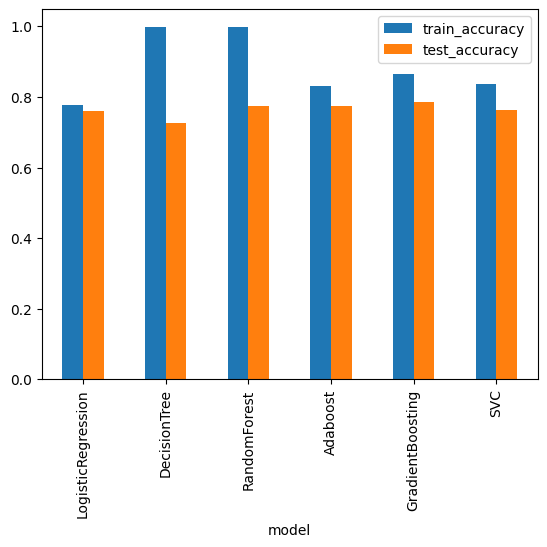

In [ ]:
df1.plot(x='model',y=['train_accuracy','test_accuracy'],kind='bar')

### Model selection
- Logistic Regression recall is less as compared to others
- Decision Tree and RandomForest are overfitting as Train accuracy and test accuracy has large gap
- Among Adaboost, GradientBoosting, SVC - GradintBoosting seems like balance model with balance accuracy